In [1]:
import numpy as np 
import sys
import torch
sys.path.append('../src/')
import matplotlib.pyplot as plt
from generalist_class import Generalist
from tqdm import tqdm
import seaborn as sns 


In [2]:
## create the data of AC or CA of 400 sequences 
seq0 = np.asarray([0,1])
seq1 = np.asarray([1,0])
## 
N = 200 
data =np.vstack( (np.broadcast_to(seq0, (N,2)) , np.broadcast_to(seq1, (N,2))) )
## shuffle 
np.random.shuffle(data)

In [3]:
## change it to one hot encoded data 
from data_process_fns import Binarify
bin_dat = Binarify(data)
bin_dat.shape

(21, 400, 2)

### Training GENERALIST with the default random initialization and k = 1

In [12]:
# random initialization first 
gen0 = Generalist(bin_dat, k=1, param_init='rand')

In [13]:
gen0.train()

running on cpu
one hot encoded data of size torch.Size([21, 400, 2])
started inference...
takes 0.0018148422241210938 seconds for the first step
inference is over
step on avg takes 0.0005406110988782303 seconds 
inference done in 0.006027813752492269 minutes for k = 1, in 669 steps


400

In [14]:
z = gen0.z
z.shape[0]
z = torch.reshape(z,(z.shape[0],))
z = z.numpy()
Larr = gen0.Larr
Larr = Larr.numpy()

-4.439317

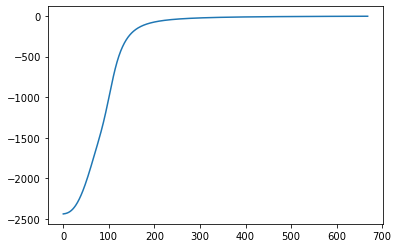

In [16]:

plt.plot(Larr)
Larr[-1]

Text(0.5, 1.0, 'Example CA , AC with random initialization')

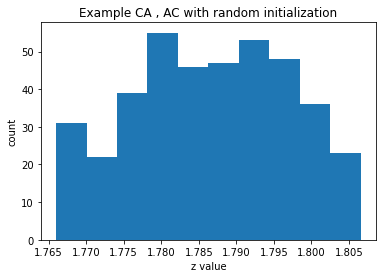

In [10]:
plt.hist(z)
plt.xlabel('z value')
plt.ylabel('count')
plt.title('Example CA , AC with random initialization')

In [11]:
gen0.t

tensor([[[-1.5977, -1.6058]],

        [[-1.5959, -1.6094]],

        [[ 1.9657,  1.9142]],

        [[ 2.0355,  1.9597]],

        [[ 2.0131,  1.9374]],

        [[ 1.8681,  1.9941]],

        [[ 1.9048,  1.9222]],

        [[ 1.9871,  1.9519]],

        [[ 1.8829,  2.0054]],

        [[ 1.9586,  2.0659]],

        [[ 1.9666,  1.8950]],

        [[ 1.9480,  2.0248]],

        [[ 1.9127,  1.9014]],

        [[ 1.9197,  1.9609]],

        [[ 1.8653,  1.9762]],

        [[ 1.9710,  1.9080]],

        [[ 1.9218,  1.9276]],

        [[ 1.9531,  1.9353]],

        [[ 2.0401,  1.8630]],

        [[ 1.9569,  2.0069]],

        [[ 2.0550,  1.9214]]], dtype=torch.float64)

In [12]:
# ### Generate sequences 
# ngen = 400 #same number of sequences in natural MSA 
# generated_data = gen0.generate(nGen = ngen) # output_binary = False
# from performance_fns import Calc_nBody_Corr


### Training with custom initialization

In [13]:
gen0.t.shape

torch.Size([21, 1, 2])

In [19]:
t0 = np.concatenate((np.asarray([1,-1]), np.zeros(19)))
t1 = np.concatenate((np.asarray([-1,1]), np.zeros(19)))
theta_init = np.zeros((21,1,2))
theta_init[:,0,0] = t0
theta_init[:,0,1] = t1
theta_init = torch.from_numpy(theta_init)



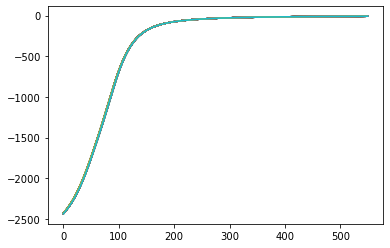

In [20]:
for rep in range(reps):
    gen1 = Generalist(one_hot_data=bin_dat, k = 1, t_init = theta_init, param_init='rand')
    gen1.train(verbose = False)
    z = gen1.z
    # z.shape[0]
    # z = torch.reshape(z,(z.shape[0],))
    # z = z.numpy()
    Larr = gen1.Larr
    Larr = Larr.numpy()
    plt.plot(Larr)

In [17]:
gen1.t

tensor([[[ 3.6620, -3.6904]],

        [[-3.6904,  3.6620]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]],

        [[ 0.0892,  0.0892]]], dtype=torch.float64)

In [42]:
z = gen1.z
z.shape[0]
z = torch.reshape(z,(z.shape[0],))
z = z.numpy()
Larr = gen1.Larr
Larr = Larr.numpy()

Text(0.5, 1.0, 'Example CA , AC with specific initialization')

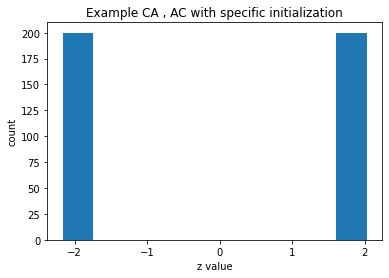

In [43]:
plt.hist(z)
plt.xlabel('z value')
plt.ylabel('count')
plt.title('Example CA , AC with specific initialization')

Text(0.5, 1.0, 'Likelihood -7.098508358001709')

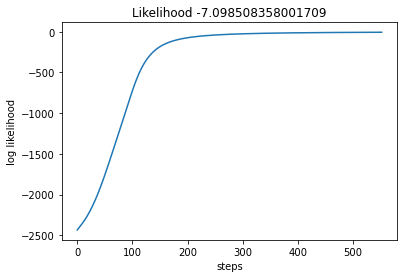

In [45]:

plt.plot(Larr)
plt.xlabel('steps')
plt.ylabel('log likelihood')
plt.title(f'Likelihood {Larr[-1]}')

### Training with SVD initialization

In [4]:
k = 1
model = Generalist(bin_dat , k = k)
model.train()

running on cpu
one hot encoded data of size torch.Size([21, 400, 2])
started inference...
takes 0.0025718212127685547 seconds for the first step
inference is over
step on avg takes 0.0005611337504340607 seconds 
inference done in 0.0038531184196472167 minutes for k = 1, in 412 steps


In [5]:
z = model.z
z.shape[0]
z = torch.reshape(z,(z.shape[0],))
z = z.numpy()
Larr = model.Larr
Larr = Larr.numpy()

(array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
 array([-2.21402585, -1.86393989, -1.51385393, -1.16376796, -0.813682  ,
        -0.46359603, -0.11351007,  0.23657589,  0.58666186,  0.93674782,
         1.28683378]),
 <BarContainer object of 10 artists>)

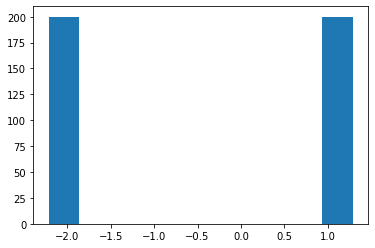

In [6]:
plt.hist(z)

In [7]:
print(model.t)

tensor([[[-16.1861,   3.2597]],

        [[  1.9296,  -3.9683]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[-11.6617,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]],

        [[ -1.9963,   0.4130]]], dtype=torch.float64)


In [4]:
## initialize only the z and then leave the theta random 
k = 1
nA, nS, nP = bin_dat.shape
data_resh = np.swapaxes(bin_dat, 0,-1)
data_resh = np.swapaxes(data_resh, 0,1)
data_resh = np.reshape(data_resh, (nS, nP*nA))
u, s, vh = np.linalg.svd(data_resh, full_matrices=False)
z = u[:,:k]
z = torch.from_numpy(z)
t = np.diag(s)[:k,:k] @ vh[:k,:]
t = np.reshape(t , (nA,k,nP))
t = torch.from_numpy(t)
# # t = torch.diag(s) @ vh ; t = t[:k,:]
# t = np.reshape(t , (nA,k,nP))

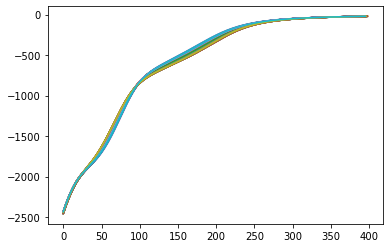

In [7]:
reps = 100
for rep in range(reps):
    model0 = Generalist(bin_dat, k =k,  t_init=t, param_init='rand')
    model0.train(verbose = False)
    Larr = model0.Larr
    Larr = Larr.numpy()
    plt.plot(Larr)
    # print(Larr[-1])
    # plt.hist(z)

In [9]:
model0.t

tensor([[[-16.1186,   3.2172]],

        [[  1.8973,  -3.7763]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[-11.8074,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]],

        [[ -2.0373,   0.3978]]], dtype=torch.float64)

In [12]:
model0 = Generalist(bin_dat, k =k, z_init=z, t_init=t)
model0.train(verbose = False, thresh = 0.0001)

In [20]:
z = model0.z
z.shape[0]
z = torch.reshape(z,(z.shape[0],))
z = z.numpy()
Larr = model0.Larr
Larr = Larr.numpy()

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([-7.07106781e-02, -6.36396103e-02, -5.65685425e-02, -4.94974747e-02,
        -4.24264069e-02, -3.53553391e-02, -2.82842712e-02, -2.12132034e-02,
        -1.41421356e-02, -7.07106781e-03,  2.31929835e-32]),
 <a list of 400 BarContainer objects>)

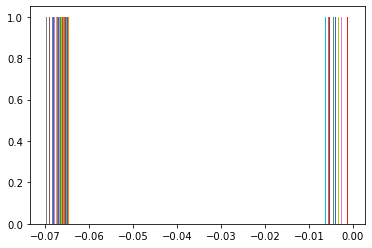

In [13]:
plt.hist(z)

In [14]:
print(model0.t)

tensor([[[-17.0975,   5.5668]],

        [[  2.5289,  -6.1320]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[-10.5125,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]],

        [[ -2.6383,   0.7922]]], dtype=torch.float64)


-4.318243

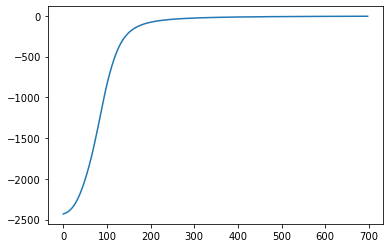

In [23]:
plt.plot(Larr)
Larr[-1]

### Changing the threshold of learning 

In [35]:
thresh_list = [1,.1,.01,.001,.0001]
## for different 
gen_list = []
for thresh in thresh_list:
    gen2 = Generalist(bin_dat, k = 1)
    gen2.train(thresh = thresh)
    gen_list.append(gen2)

running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.014292240142822266 seconds for the first step
inference is over
step on avg takes 0.0005931818926775898 seconds 
inference done in 0.0026693185170491534 minutes for k = 1, in 270 steps
running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.0012688636779785156 seconds for the first step
inference is over
step on avg takes 0.0005338175156537224 seconds 
inference done in 0.007562414805094401 minutes for k = 1, in 850 steps
running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.0013098716735839844 seconds for the first step
inference is over
step on avg takes 0.0005295774823625461 seconds 
inference done in 0.04988619883855184 minutes for k = 1, in 5652 steps
running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.0011029243469238281 seconds for the first step
inference is over
step on avg takes 0.0005243351474152

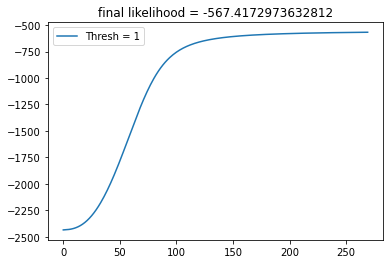

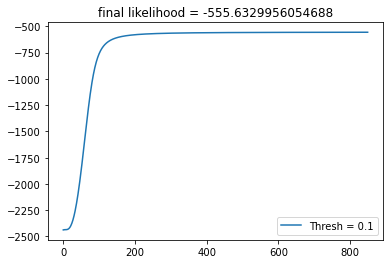

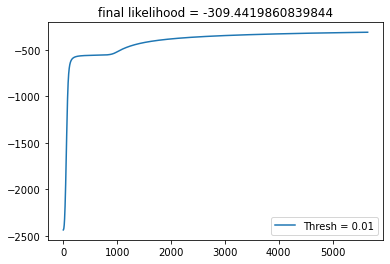

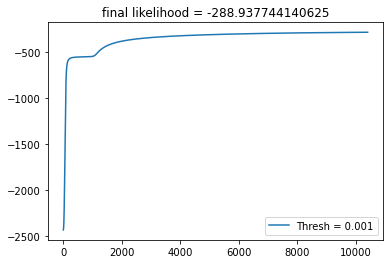

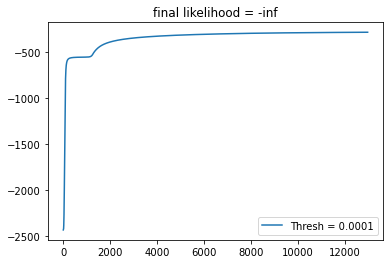

In [41]:
i = 0
for thresh in thresh_list:
    genera = gen_list[i]
    Larr = genera.Larr
    Larr = Larr.numpy()
    plt.plot(Larr, label = f'Thresh = {thresh}')
    i+=1 
    plt.title(f'final likelihood = {Larr[-1]}')
    plt.legend()
    plt.show()

### Changing the training learning rate 

In [47]:
lr_list = [1,.1]
## for different 
gen_list = []
for lr in lr_list:
    gen2 = Generalist(bin_dat, k = 1)
    gen2.train(alpha = lr)
    gen_list.append(gen2)

running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.0013890266418457031 seconds for the first step
inference is over
step on avg takes 0.0008822849818638393 seconds 
inference done in 0.00010293324788411459 minutes for k = 1, in 7 steps
running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.0014710426330566406 seconds for the first step
inference is over
step on avg takes 0.0007048406099018298 seconds 
inference done in 0.00022319952646891275 minutes for k = 1, in 19 steps


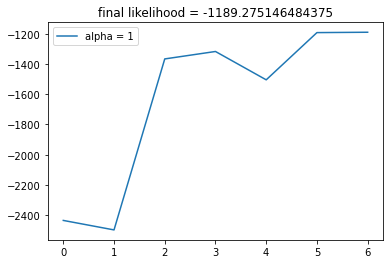

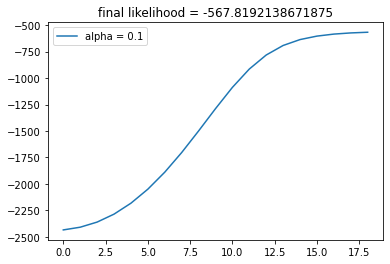

In [48]:
i = 0
for lr in lr_list:
    genera = gen_list[i]
    Larr = genera.Larr
    Larr = Larr.numpy()
    plt.plot(Larr, label = f'alpha = {lr}')
    i+=1 
    plt.title(f'final likelihood = {Larr[-1]}')
    plt.legend()
    plt.show()

### try a version where there is no adam -- regular gradient decent 

In [10]:
model = Generalist(bin_dat, k = 1)

In [11]:
model.train(optimizer = 'reg', thresh = 0.001)

running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.006968021392822266 seconds for the first step
inference is over
step on avg takes 0.0004721095197346984 seconds 
inference done in 0.4442078471183777 minutes for k = 1, in 56454 steps


In [12]:
Larr = model.Larr.numpy()

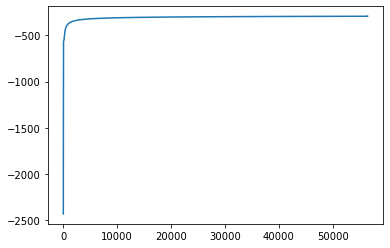

In [13]:
plt.plot(Larr)

In [15]:
Larr

array([-2434.1882 , -2431.3965 , -2428.2012 , ...,  -291.85806,
        -291.68484,        -inf], dtype=float32)

### Dealing with infinities 

In [1]:

### try regular gradient with initializatopm 
t0 = np.concatenate((np.asarray([1,-1]), np.zeros(19)))
t1 = np.concatenate((np.asarray([-1,1]), np.zeros(19)))
theta_init = np.zeros((21,1,2))
theta_init[:,0,0] = t0
theta_init[:,0,1] = t1
theta_init = torch.from_numpy(theta_init)


NameError: name 'np' is not defined

In [22]:
model = Generalist(bin_dat, k = 1,t_init = theta_init)

In [23]:
model.train(optimizer = 'reg')

running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.003052949905395508 seconds for the first step
inference is over
step on avg takes 0.0006782213846842448 seconds 
inference done in 0.00030519962310791013 minutes for k = 1, in 27 steps


In [24]:
Larr = model.Larr.numpy()

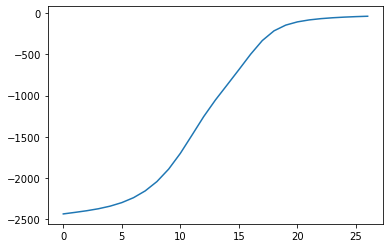

In [25]:
plt.plot(Larr)

In [26]:
Larr[-1]


-36.45983

In [30]:
import torch 
torch.randn(10)
r1 = 1 
r2 = -1 
a = 100
b = 100
(r1 - r2) * torch.rand(a, b) + r2

tensor([[-0.2330,  0.7321, -0.5042,  ..., -0.4632, -0.4109, -0.9864],
        [ 0.6466,  0.4587,  0.6012,  ..., -0.8465, -0.1493, -0.7346],
        [ 0.9511, -0.0823,  0.1883,  ...,  0.7945, -0.5843, -0.7894],
        ...,
        [ 0.2233,  0.3805, -0.5784,  ...,  0.5916,  0.5920,  0.1697],
        [ 0.7051, -0.3970,  0.0303,  ...,  0.7988, -0.9665,  0.9966],
        [ 0.7250, -0.2704,  0.8991,  ..., -0.6484,  0.8196, -0.7462]])

### try with different initialization 

100%|█████████████████████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


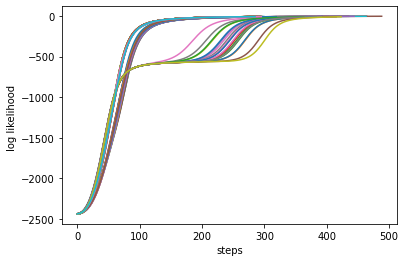

In [6]:
model_list = []
count_good = 0
for i in tqdm(range(100)):
    model = Generalist(bin_dat, k = 2)
    model.train(verbose = False, thresh = 1)
    # model_list.append(model)
    Larr = model.Larr.numpy()
    if Larr[-1]>-100:
        count_good +=1 
        
    plt.plot(Larr)
    plt.xlabel('steps')
    plt.ylabel('log likelihood ')

In [11]:
z= model.z.numpy()

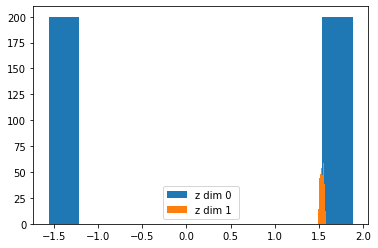

In [13]:
plt.hist(z[:,0], label = 'z dim 0 ')
# plt.title()
plt.hist(z[:,1], label = 'z dim 1 ')
# plt.title('z dim 1 ')
plt.legend()

### Training with zero initialization

In [323]:
nS = int(2*N)
nP = 2 
k = 1
nA = 21

In [324]:
theta_init = np.zeros((nA,k,nP))
z_init = np.zeros((nS,k))
theta_init = torch.from_numpy(theta_init)
z_init = torch.from_numpy(z_init)

In [325]:
# initialize model
model = Generalist(bin_dat, z_init=z_init, t_init=theta_init, k = k)

In [326]:
model.train()

running on cpu
one hot encoded data of size (21, 400, 2)
started inference...
takes 0.002514362335205078 seconds for the first step
inference is over
step on avg takes 0.002653360366821289 seconds 
inference done in 4.4222672780354815e-05 minutes for k = 1, in 1 steps


In [327]:
model.zng_arr

tensor([0.])

In [328]:
# model.z

In [329]:
## try SVD of the data
bin_dat.shape

(21, 400, 2)

In [477]:
data_resh = np.reshape(bin_dat, (nS, nP*nA))
np.sum(data_resh, axis = 1)
data_resh = np.swapaxes(bin_dat, 0,-1)
data_resh = np.swapaxes(data_resh, 0,1)
data_resh.shape
# bin_dat.shape
np.sum(data_resh, axis = -1)
data_resh = np.reshape(data_resh, (nS, nP*nA))
# data_resh = data_resh + 10**(-3)
# data_resh = data_resh
u, s, vh = np.linalg.svd(data_resh, full_matrices=False)
print(u.shape)
print(s.shape)
print(vh.shape)
z = u[:,:k]
z.shape
t = (np.diag(s) @ vh)[:,:k]
# t = (np.diag(s) @ vh)[:k,:]
t = np.reshape(t , (nA,k,nP))
# t
z = torch.from_numpy(z)
t = torch.from_numpy(t)

(400, 42)
(42,)
(42, 42)


In [479]:
model_list = []
t_list = []
z_list = []
Larr_list = []
reps = 50
k = 1
for rep in tqdm(range(reps)):
    model = Generalist(bin_dat,k = k)
    model.train(verbose = False)
    t_mod = model.t
    z_mod = model.z 
    Larr = model.Larr
    t_mod = t_mod.numpy()
    z_mod = z_mod.numpy()
    Larr = Larr.numpy()
    t_mod = np.reshape(t_mod, (t_mod.shape[0], t_mod.shape[-1]))
    z_mod = np.reshape(z_mod, (z_mod.shape[0],))
    t_list.append(t_mod)
    z_list.append(z_mod)
    Larr_list.append(Larr)
    # pi = pi.numpy()

100%|███████████████████████████████████████████| 50/50 [00:21<00:00,  2.32it/s]


### Plotting the different runs

Text(0.5, 1.0, '50 runs')

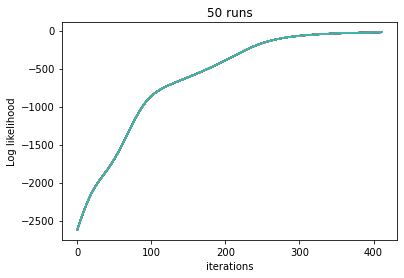

In [8]:
for i in range(reps):
    plt.plot(Larr_list[i])
plt.xlabel('iterations')
plt.ylabel('Log likelihood')
plt.title(f'{reps} runs')

Text(0.5, 1.0, '50 runs')

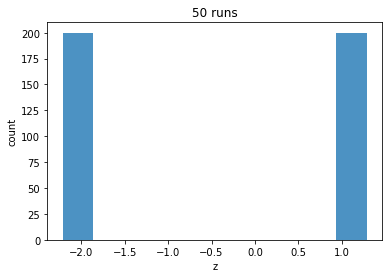

In [26]:
for i in range(1):
    plt.hist(z_list[i], alpha = .8)
plt.xlabel('z')
plt.ylabel('count')
plt.title(f'{reps} runs')

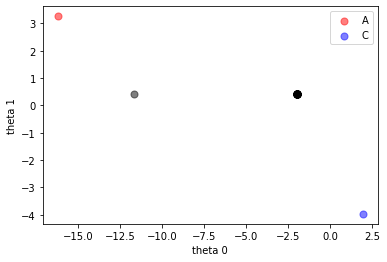

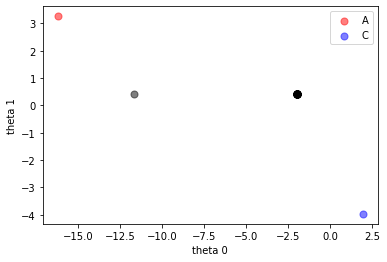

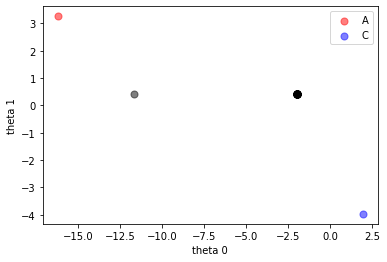

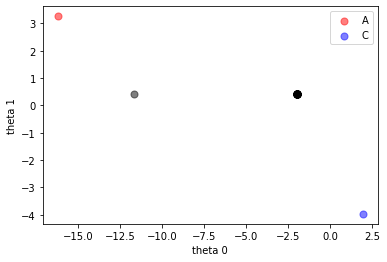

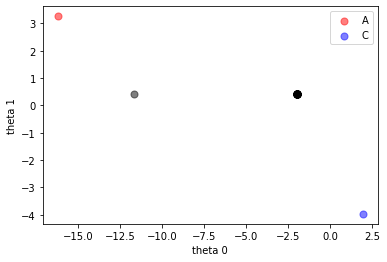

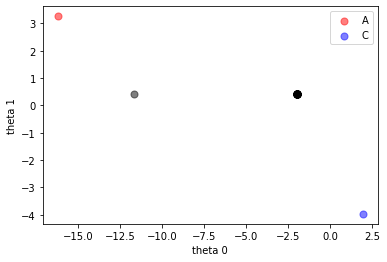

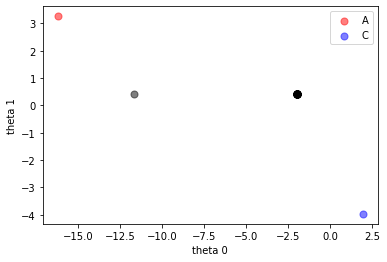

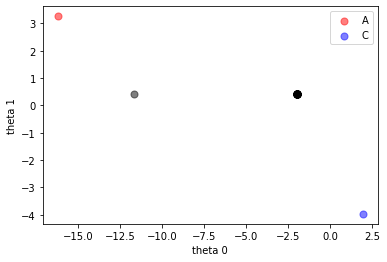

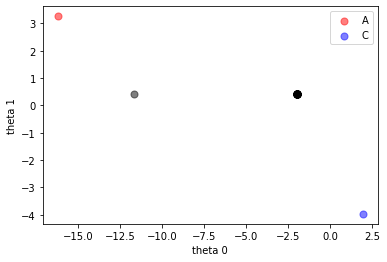

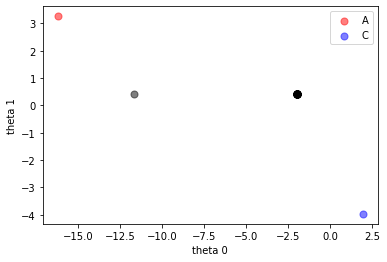

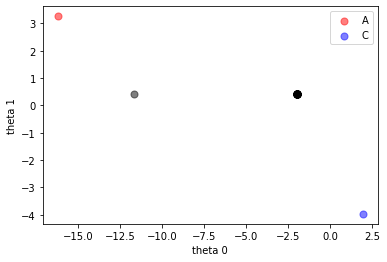

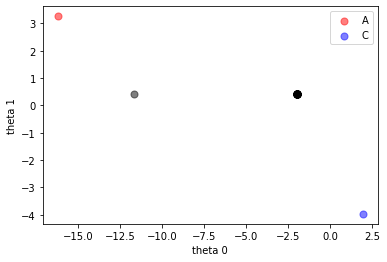

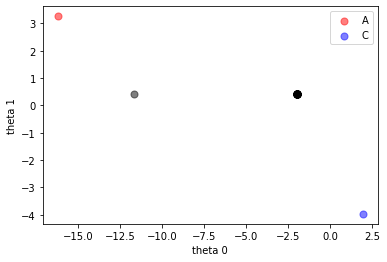

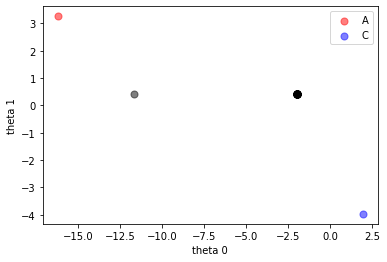

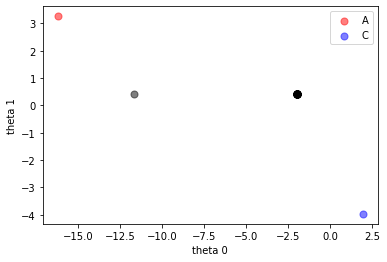

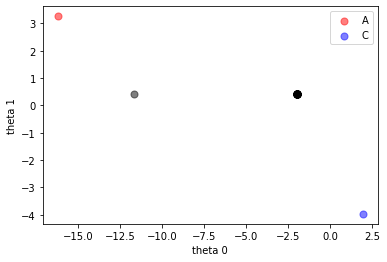

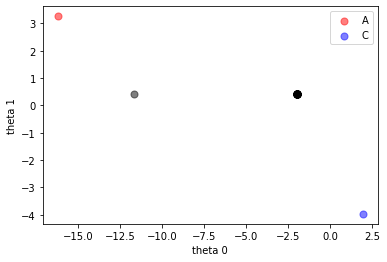

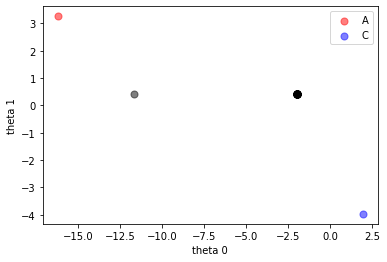

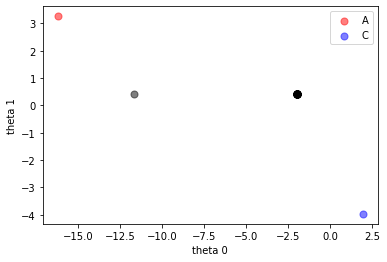

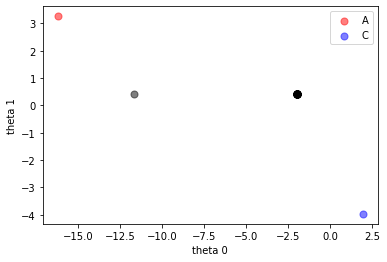

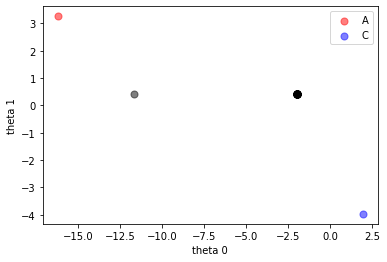

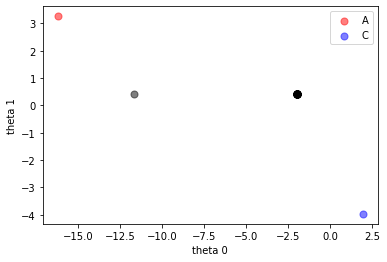

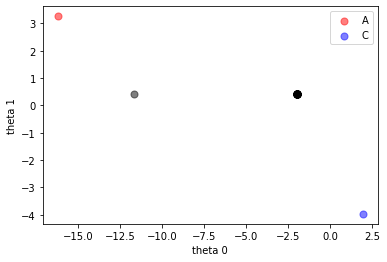

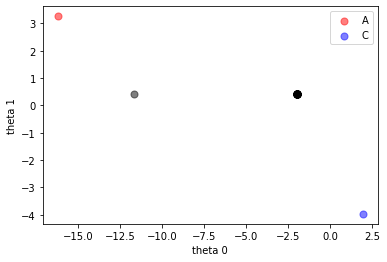

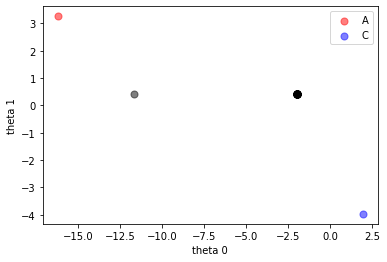

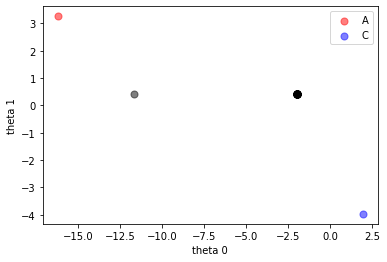

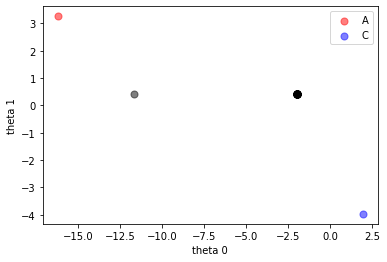

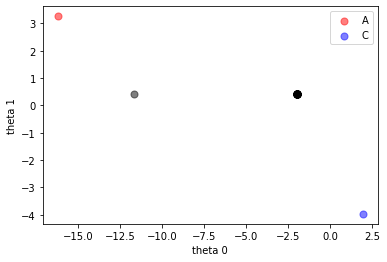

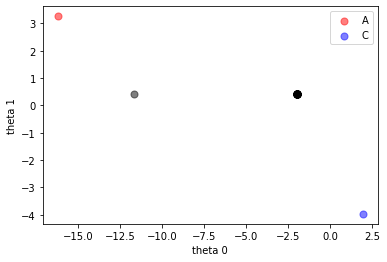

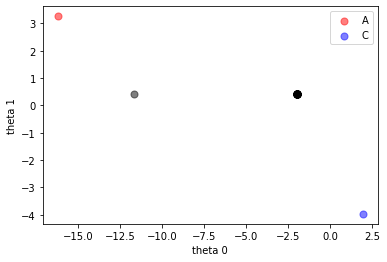

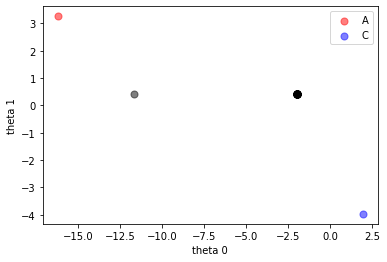

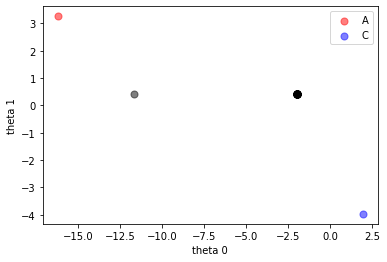

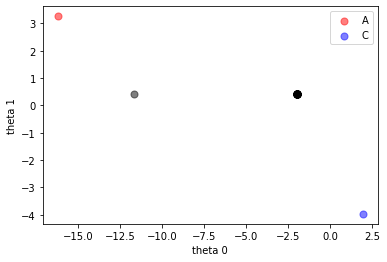

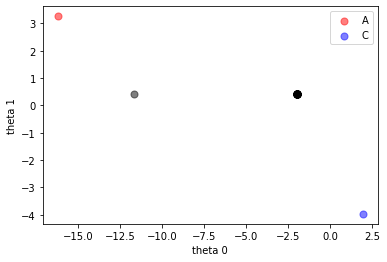

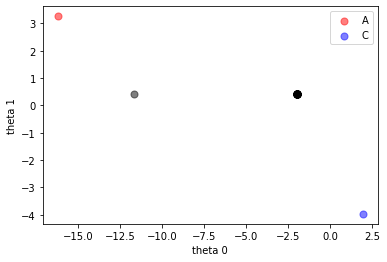

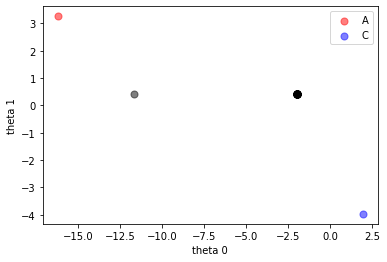

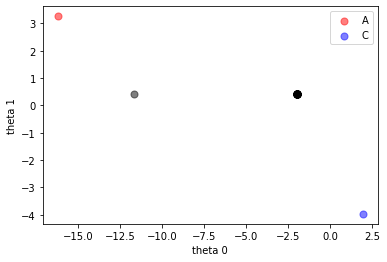

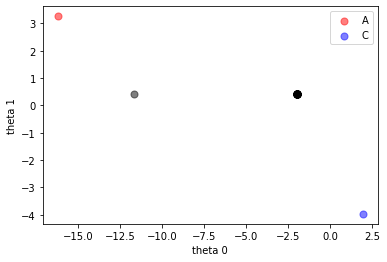

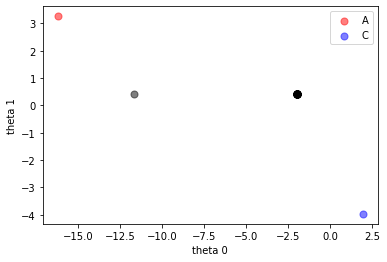

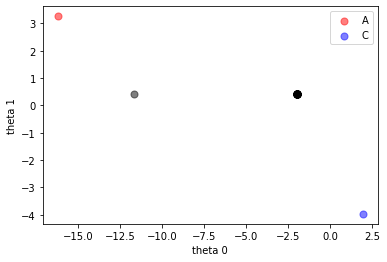

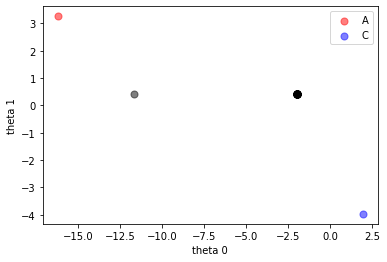

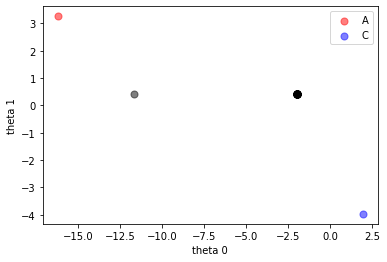

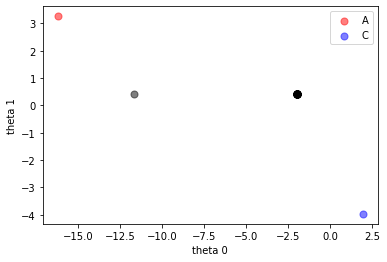

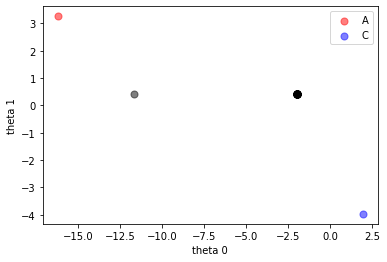

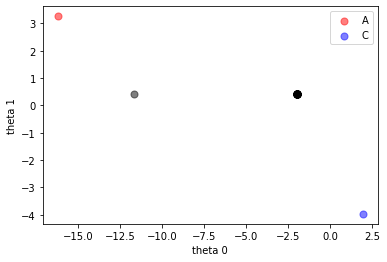

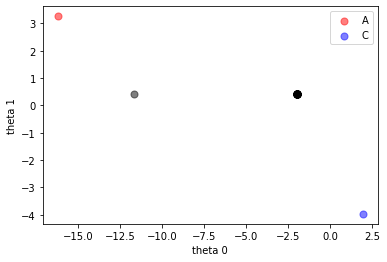

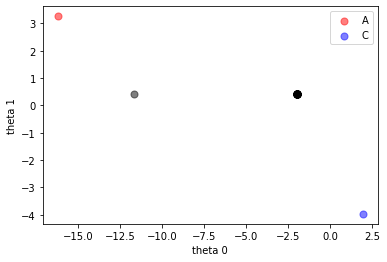

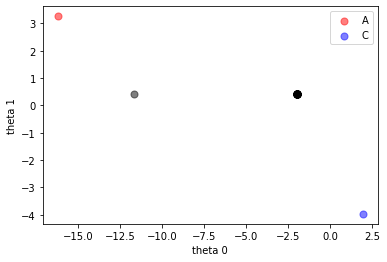

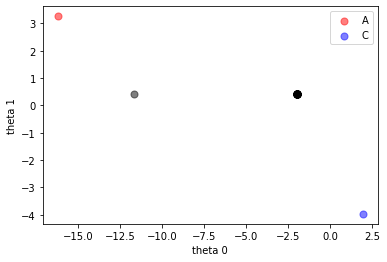

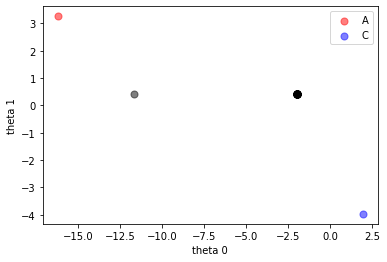

In [58]:
# plt.clf()
for i in range(50):
    
    t = t_list[i]
    for ii in range(21):
        # print(ii)
        if ii==0:
            label = 'A'
            c = 'r'
        elif ii==1:
            label = 'C'
            c = 'b'
        else:
            label = ''
            c = 'k'
        plt.scatter(t[ii,0], t[ii,1], s= 50, label = label, alpha = .5)
    plt.xlabel('theta 0')
    plt.ylabel('theta 1')
    # plt.scatter(t[0,0], t[0,1], s= 50,  label = 'A', color = 'r', alpha = .5)
    plt.legend()
    plt.show()

array([[-16.18608897,   3.25971808],
       [  1.92963156,  -3.96828659],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [-11.66169718,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546],
       [ -1.99626511,   0.41304546]])

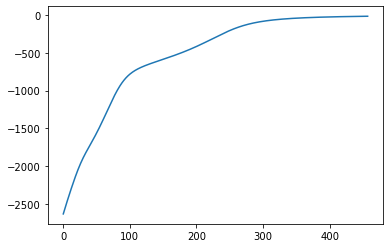

In [452]:
plt.plot(Larr)

In [454]:
pi.shape

(21, 400, 2)

In [18]:
## initialize 
ncomb = 2
nA, nS, nA = bin_dat.shape

prob_matix = np.zeros((nS, ncomb+1))
data_matrix = np.zeros((nS, ncomb+1))
big_prob_matrix =  np.zeros((nS, 2*(ncomb+1)))
for i in range(nS): 
    ## for AC 
    big_prob_matrix[i,0] = pi[0,i,0]*pi[1,i,1]
    big_prob_matrix[i,1] = bin_dat[0,i,0]*bin_dat[1,i,1]
    
    ## for CA 
    big_prob_matrix[i,2] = pi[1,i,0]*pi[0,i,1]
    big_prob_matrix[i,3] = bin_dat[1,i,0]*bin_dat[0,i,1]
    ## sum 
    big_prob_matrix[i,4] = big_prob_matrix[i,0] +big_prob_matrix[i,2]
    big_prob_matrix[i,5] = big_prob_matrix[i,1] +big_prob_matrix[i,3]

# data_matrix = np.zeros((nS, ncomb+1))
# for i in range(nS): 
#     ## for AC 
#     data_matrix[i,0] = bin_dat[0,i,0]*bin_dat[1,i,1]
#     ## for CA 
#     data_matrix[i,1] = bin_dat[1,i,0]*bin_dat[0,i,1]
#     ## sum 
#     data_matrix[i,2] = data_matrix[i,0] +data_matrix[i,1]
    

Text(0.5, 1.0, 'Probabilities of observing AC and CA \n from model and data')

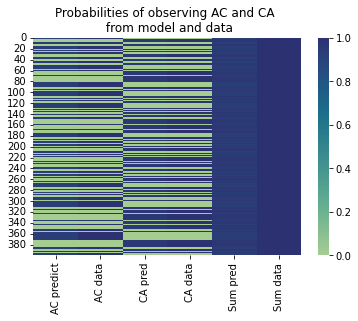

In [19]:
# data_matrix
## seaborn heat ma[ ]
x_labels = ['AC predict', 'AC data', 'CA pred', 'CA data', 'Sum pred', 'Sum data']
# fig, ax = plt.subplots(ncols = 1, nrows = )
sns.heatmap(big_prob_matrix, cmap="crest", xticklabels=x_labels)
plt.title('Probabilities of observing AC and CA \n from model and data')
# sns.xaxis.tick_top()

In [418]:
z = model.z.numpy()
t = model.t.numpy()

### Try the initialization now built in the class

In [4]:
model_list = []
t_list = []
z_list = []
Larr_list = []
reps = 50
for rep in tqdm(range(reps)):
    model = Generalist(bin_dat, k = 1)
    model.train(verbose = False)
    t_mod = model.t
    z_mod = model.z 
    Larr = model.Larr
    t_mod = t_mod.numpy()
    z_mod = z_mod.numpy()
    Larr = Larr.numpy()
    t_mod = np.reshape(t_mod, (t_mod.shape[0], t_mod.shape[-1]))
    z_mod = np.reshape(z_mod, (z_mod.shape[0],))
    t_list.append(t_mod)
    z_list.append(z_mod)
    Larr_list.append(Larr)
    # pi = pi.numpy()

100%|███████████████████████████████████████████| 50/50 [00:20<00:00,  2.39it/s]


In [15]:
pi = model.pi
pi = pi.numpy()

In [13]:
prob = pi.numpy()

In [9]:
z_init =  torch.Tensor([])
t_init = torch.Tensor([])
param_init = 'svd' 
init_shapez =  z_init.shape[0]
init_shapet = t_init.shape[0]

In [16]:
if ((init_shapet == 0) & (init_shapez == 0) & (param_init=='svd')):
    print('True')

True


In [6]:
import torch
print( torch.Tensor([]).shape[0] ==0 & torch.Tensor([]).shape[0] ==0 )

True


### Developing the code for adding to GENERALIST class in torch

In [33]:
bin_data = torch.from_numpy(bin_dat)
nA, nS, nP = bin_data.shape
k = 1
# data_resh = torch.reshape(bin_data, (nS, nP*nA))
# torch.sum(data_resh, axis = 1)
data_resh = torch.swapaxes(bin_data, 0,-1)
data_resh = torch.swapaxes(data_resh, 0,1)

print(data_resh.shape)
# # bin_dat.shape
# torch.sum(data_resh, axis = -1)
data_resh = torch.reshape(data_resh, (nS, nP*nA))
# data_resh = data_resh + 10**(-3)
# data_resh = data_resh
u, s, vh = torch.linalg.svd(data_resh, full_matrices=False)
# print(u.shape)
# print(s.shape)
# print(vh.shape)
print(u.shape)
z = u[:,:k]
# z.shape
t = (torch.diag(s) @ vh)[:,:k]
t0 = (torch.diag(s)[:k,:k] @ vh[:k,:])
print(t0.shape)
print(t.shape)
print(t0 ==t)
# t = (np.diag(s) @ vh)[:k,:]
t = torch.reshape(t , (nA,k,nP))
# # t
# z = torch.from_numpy(z)
# t = torch.from_numpy(t)

torch.Size([400, 2, 21])
torch.Size([400, 42])
torch.Size([1, 42])
torch.Size([42, 1])
tensor([[ True, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False,  True,  True,  ...,  True,  True,  True]])


In [10]:
u.shape


torch.Size([400, 42])